In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

<p> This is used to print in bold text </p>

In [2]:
class ColorForPrint:
    BOLD = '\033[1m'
    END = '\033[0m'

In [3]:
# Loading the dataset
LoanDF = pd.read_csv('loan/loan.csv')
LoanDF.head()

C:\Users\nithy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<p> Data Understanding is a common class which will do the data description, removes unwanted rows and columns. <br>
    The dataframe is reused as an object for the methods.  <br> 
<br>
Data Description - Basic information of the data from the dataframe. 
<pre>
RemoveUnwantedRowsCols - Does common data analysis for Rows and Columns
    checkForUnwantedColumns - Checks for columns only if all the values are NaN
    nullValueColumnAnalysis - Checks for higher number of null values in columns
    nullValueRowAnalysis - Checks for higher number of null values in rows. If remove rows is true then it will remove 
                            null rows. 
    detectContinuousCategorical - Seperates continuous and categorical variables in the dataset with a threshold 
                                    of 10 different values.
    numericalColumnsAnalysis - Column analysis for continuous variables. This will analyse the continuous columns that 
                               are obtained after detecting categorical and continuous variables and does 
                               segmented analysis as well given the condition.
    categoricalColumnsAnalysis - Column analysis for continuous variables. This will analyse the categorical columns 
                                 that are obtained after detecting categorical and continuous variables and does 
                                 segmented analysis as well given the condition.
</pre>
</p>

In [4]:
class DataUnderstanding:
    def __init__(self, LoanDataFrame):
        self.LoanDataFrame = LoanDataFrame
        self.RemoveUnwantedRowsCols = self.RemoveUnwantedRowsCols(self)
    def dataDescription(self):
        print("Total number values are", self.LoanDataFrame.size)
        print("Loan Data set has", self.LoanDataFrame.shape[0], "rows and", self.LoanDataFrame.shape[1], "columns")
        print("Number of dimensions are", self.LoanDataFrame.ndim) # as it is a DataFrame
        print()
        DataTypes = self.LoanDataFrame.dtypes.value_counts()
        print("There are", len(DataTypes), "datatypes in the data set",)
        print(DataTypes)
        print()
        # Mean takes time as this query took time even without the function
        print(ColorForPrint.BOLD,"Mean of Dataset ", ColorForPrint.END)
        print("Please wait.... ") 
        print(self.LoanDataFrame.mean().sort_values(ascending = False).head(20))
        print()
        print(ColorForPrint.BOLD,"Median of Dataset ", ColorForPrint.END)
        print(self.LoanDataFrame.median().sort_values(ascending = False).head(20))
        print()
        print(ColorForPrint.BOLD,"Standard deviation of Dataset ", ColorForPrint.END)
        print(self.LoanDataFrame.std().sort_values(ascending = False).head(20))
        print()
        print(ColorForPrint.BOLD,"Minumum Value of Dataset ", ColorForPrint.END)
        print(self.LoanDataFrame.min().head(20))
        print()
        print(ColorForPrint.BOLD,"Maximum Value of Dataset ", ColorForPrint.END)
        print(self.LoanDataFrame.max().head(20))
        print()
        print(ColorForPrint.BOLD,"25% of Dataset ", ColorForPrint.END)
        print(self.LoanDataFrame.quantile(0.25).sort_values(ascending = False).head(20))
        print()
        print(ColorForPrint.BOLD, "50% of Dataset ", ColorForPrint.END)
        print(self.LoanDataFrame.quantile(0.50).sort_values(ascending = False).head(20))
        print()
        print(ColorForPrint.BOLD, "75% of Dataset ", ColorForPrint.END)
        print(self.LoanDataFrame.quantile(0.75).sort_values(ascending = False).head(20))
        print()
        print(ColorForPrint.BOLD, "Total number of Null Values ", ColorForPrint.END)
        NullDF = (LoanDF.isnull().sum().sort_values(ascending = False)).to_frame()
        NullDF.columns = ['NullValues']
        NullValuesCount = NullDF[NullDF == NullDF['NullValues'][0]].count()[0]
        if NullValuesCount > 0:
            print("We can see that there are many null value columns so we have to remove it.")
        else:
            print("There are no columns with all values as null values.")
        print()
    class RemoveUnwantedRowsCols():
        def __init__(self, DataUnderstanding):
            # To access the dataframe defined in the outer class we are in need of this
            self.dataUnderObj = DataUnderstanding
        # Remove columns only if all the values are NaN
        def checkForUnwantedColumns(self, ColumnValues):
            unwantedCols = []
            for column in ColumnValues:
                # Check if all the column values are null or all column values are the same (can be anything) then only remove it.  
                if (LoanDF[column].isnull().all()) | (LoanDF[LoanDF[column][0] == LoanDF[column]][column].shape[0] == LoanDF.shape[0]):
                    unwantedCols.append(column)
                else: 
                    continue
            print("There are", len(unwantedCols) ,"unwanted columns in the dataset")
            return unwantedCols
        # Performs null value column analysis, given a threshold of default 20000 as that the number of high value for 39717 rows. 
        # So we can omit the columns
        def nullValueColumnAnalysis(self, threshold = 20000):
            NullCountRows = self.dataUnderObj.LoanDataFrame.isnull().sum().to_frame('Null Count')
            NullCountRows = NullCountRows[NullCountRows['Null Count'] > threshold]
            if len(NullCountRows > 0):
                print(self.dataUnderObj.LoanDataFrame['loan_status'].value_counts())
                print("We can see that loan_status doesn't have casing disorders of the values. We can proceed now.")
                print("There are ",len(NullCountRows)," null column values with more than threshold.So we will remove it.")
                print("But before this we have to check if this is an important variable or not. For this we have to compare with the predicting variable, loan_status")
                # Groupby loan_status
                GroupedDF = self.dataUnderObj.LoanDataFrame.groupby('loan_status')
                print("We can observe that..")
                for nullCount in range(len(NullCountRows)):
                    print(end = '\t')
                    print(NullCountRows['Null Count'].index[nullCount], "has", NullCountRows['Null Count'][nullCount],"null values")
                    print(GroupedDF[NullCountRows['Null Count'].index[nullCount]].first())
                    print()
                return NullCountRows
            else:
                print("There are no column null values greater than a threshold of", threshold ,"in the dataset")
        # Performs null value analysis in rows as the rows shouldn't contain null values. 
        def nullValueRowAnalysis(self, RemoveRows = False):
            countValueDF = pd.DataFrame([], columns = ["NullRowCount"])
            countValueList = []
            LoanDfRangeCount = range(len(self.dataUnderObj.LoanDataFrame)-1)
            for i in LoanDfRangeCount:
                countValue = self.dataUnderObj.LoanDataFrame.iloc[i].isnull().sum()
                countValueDF.at[i,"NullRowCount"]= countValue
            if (countValue > 0) and (RemoveRows == True):
                return list(countValueDF[countValueDF["NullRowCount"] > 0].index)
            
            CountValueRangeCount = range(len(countValueDF.value_counts()) -1)
            # Now we will plot the count
            for i in CountValueRangeCount:
                Df = countValueDF[countValueDF['NullRowCount'] > i]
                countValueList.append(len(Df))
            # Gets the unique row value of the count. 
            print("unique row values are", set(countValueList))
            fig = plt.figure(figsize = (10, 5))
            # creating the bar plot
            x = range(len(countValueDF.value_counts()) -1)
            plt.bar(x, countValueList, color ='maroon',
                    width = 0.4)
            plt.xlabel('Null values')
            plt.ylabel('number of Rows')
            plt.show()
            
    # Detect continuous and categorical variable.
    def detectContinuousCategorical(self):
        continuous_variables = []
        categorical_variables = []
        for column in self.LoanDataFrame.columns:
            Category = len(self.LoanDataFrame[column].value_counts())
            print(column,":",Category)
            if Category > 10:
                continuous_variables.append(column)
            else:
                categorical_variables.append(column)
        return continuous_variables, categorical_variables
    def numericalColumnsAnalysis(self, continuous, segmented):
        non_integer_types = []
        if segmented == False:
            for s in continuous:
                # Some variables would misbehave hence we are using Try Catch. 
                try:
                    self.LoanDataFrame.boxplot( column=s)
                    plt.ylabel(s)
                    plt.show()
                except:
                    print(s, "is not of type integer")
                    non_integer_types.append(s)
                    continue
            return non_integer_types
        # Check for segmented analysis in numerical columns
        if segmented == True:
            for s in continuous:
                # Some variables would misbehave hence we are using Try Catch. 
                try:
                    self.LoanDataFrame.boxplot(column= s, by= 'loan_status')
                    plt.ylabel(s)
                    plt.xlabel(s)
                    plt.show()
                except:
                    print(s, "is not of type integer")
                    continue
            
    def categoricalColumnsAnalysis(self, categorical_values, segmented):
        if segmented == False:
            for i in categorical_values:
                sb.countplot(x=i, data=DroppedLoanDF)
                plt.xlabel(i)
                plt.show()
        # Check for segmented analysis in categorical columns. 
        if segmented == True:
            for i in categorical_values:
                sb.countplot(x=i, hue="loan_status", data=DroppedLoanDF)
                plt.xticks(rotation=90)
                plt.xlabel(i)
                plt.show()

In [5]:
# We are using the dataframe for the whole class. 
obj = DataUnderstanding(LoanDF)

# Data Understanding Before Cleaning

<p> Before cleaning the data, we need to have a solid understanding of the data that is being cleansed. <br>
    So that we can know what must be cleansed. 
    <p>

In [6]:
dataUnderstanding = obj.dataDescription()
dataUnderstanding

Total number values are 4408587
Loan Data set has 39717 rows and 111 columns
Number of dimensions are 2

There are 3 datatypes in the data set
float64    74
object     24
int64      13
dtype: int64

 Mean of Dataset  
Please wait.... 
member_id                 850463.559408
id                        683131.913060
annual_inc                 68968.926377
revol_bal                  13382.528086
total_pymnt                12153.596544
total_pymnt_inv            11567.149118
loan_amnt                  11219.443815
funded_amnt                10947.713196
funded_amnt_inv            10397.448868
total_rec_prncp             9793.348813
last_pymnt_amnt             2678.826162
total_rec_int               2263.663172
installment                  324.561922
recoveries                    95.221624
mths_since_last_record        69.698134
out_prncp                     51.227887
out_prncp_inv                 50.989768
mths_since_last_delinq        35.900962
total_acc                     22.088828
dti  

We can see that there are many null value columns so we have to remove it.



In [7]:
ListOfUnwantedColumns = obj.RemoveUnwantedRowsCols.checkForUnwantedColumns(LoanDF.columns)
len(ListOfUnwantedColumns)

There are 60 unwanted columns in the dataset


60

# Data Cleaning

In [8]:
# Now we will remove the columns 
DroppedLoanDF = LoanDF.drop(ListOfUnwantedColumns, axis = 1)

In [9]:
# We can now see that there are 51 columns
DroppedLoanDF

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN,NaN,NaN,NaN


In [10]:
droppedObj = DataUnderstanding(DroppedLoanDF)
# Doublechecking if there are no more unwanted columns. 
droppedObj.RemoveUnwantedRowsCols.checkForUnwantedColumns(DroppedLoanDF.columns)

There are 0 unwanted columns in the dataset


[]

In [11]:
# Now we will perform null value analysis. 
NullColumnValues = droppedObj.RemoveUnwantedRowsCols.nullValueColumnAnalysis()
NullColumnValues

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64
We can see that loan_status doesn't have casing disorders of the values. We can proceed now.
There are  3  null column values with more than threshold.So we will remove it.
But before this we have to check if this is an important variable or not. For this we have to compare with the predicting variable, loan_status
We can observe that..
	mths_since_last_delinq has 25682 null values
loan_status
Charged Off    20.0
Current        38.0
Fully Paid     35.0
Name: mths_since_last_delinq, dtype: float64

	mths_since_last_record has 36931 null values
loan_status
Charged Off    113.0
Current        117.0
Fully Paid     105.0
Name: mths_since_last_record, dtype: float64

	next_pymnt_d has 38577 null values
loan_status
Charged Off      None
Current        Jun-16
Fully Paid       None
Name: next_pymnt_d, dtype: object



,Null Count
mths_since_last_delinq,25682
mths_since_last_record,36931
next_pymnt_d,38577


In [12]:
# We can see the importance of the null values and it doesn't add much importance to the predicting variable. 
# But we can note that next_pymnt_d has only values for Current. As loan takers have only the date for next_pyment date.
# We can remove this as this will make least importance to check for defaulters. 
DroppedLoanDF = DroppedLoanDF.drop(list(NullColumnValues.index), axis = 1)
DroppedLoanDF

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN,NaN,NaN,NaN


unique row values are {2, 10, 43, 492, 15310, 1595}


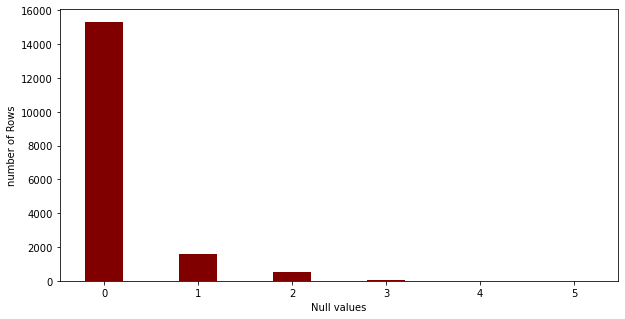

In [13]:
# We will perform null value analysis here. 
droppedObj = DataUnderstanding(DroppedLoanDF)
RowIndices = droppedObj.RemoveUnwantedRowsCols.nullValueRowAnalysis()
RowIndices

<p> We can observe that Rows with 0 null values are much higher compared to the ones having 1 null values and 2 null values. So we remove them. </p>

In [14]:
# Declare the object so that the new dataframe is loaded. 
droppedObj = DataUnderstanding(DroppedLoanDF)
RowIndices = droppedObj.RemoveUnwantedRowsCols.nullValueRowAnalysis(RemoveRows = True)
RowIndices

[0,
 2,
 5,
 8,
 11,
 14,
 15,
 16,
 19,
 23,
 24,
 25,
 26,
 28,
 30,
 32,
 34,
 42,
 43,
 46,
 47,
 48,
 49,
 52,
 53,
 57,
 61,
 64,
 72,
 75,
 76,
 78,
 80,
 83,
 92,
 94,
 95,
 96,
 105,
 107,
 108,
 110,
 112,
 113,
 114,
 116,
 118,
 119,
 126,
 131,
 133,
 135,
 136,
 139,
 140,
 143,
 144,
 149,
 150,
 154,
 155,
 156,
 159,
 161,
 162,
 168,
 169,
 170,
 174,
 175,
 179,
 182,
 183,
 185,
 186,
 189,
 190,
 195,
 199,
 200,
 201,
 202,
 204,
 206,
 208,
 209,
 211,
 212,
 214,
 216,
 218,
 219,
 221,
 224,
 226,
 227,
 229,
 232,
 233,
 235,
 237,
 239,
 240,
 241,
 243,
 246,
 250,
 251,
 252,
 255,
 260,
 261,
 262,
 264,
 267,
 269,
 270,
 271,
 272,
 275,
 277,
 278,
 279,
 282,
 285,
 288,
 292,
 293,
 295,
 296,
 299,
 300,
 302,
 308,
 309,
 310,
 313,
 316,
 317,
 318,
 319,
 322,
 323,
 324,
 326,
 327,
 333,
 334,
 339,
 340,
 342,
 345,
 348,
 349,
 351,
 353,
 354,
 355,
 358,
 361,
 363,
 365,
 368,
 369,
 370,
 372,
 374,
 377,
 378,
 379,
 382,
 386,
 391,
 392

In [15]:
# Removing 15310 rows will cause significant reduction of data
len(RowIndices)

15310

In [16]:
# Now we will perform null value analysis with a lesser threshold. 
NullColumnValues = droppedObj.RemoveUnwantedRowsCols.nullValueColumnAnalysis(threshold = 1)
NullColumnValues

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64
We can see that loan_status doesn't have casing disorders of the values. We can proceed now.
There are  11  null column values with more than threshold.So we will remove it.
But before this we have to check if this is an important variable or not. For this we have to compare with the predicting variable, loan_status
We can observe that..
	emp_title has 2459 null values
loan_status
Charged Off                       Ryder
Current        University Medical Group
Fully Paid          AIR RESOURCES BOARD
Name: emp_title, dtype: object

	emp_length has 1075 null values
loan_status
Charged Off     < 1 year
Current           1 year
Fully Paid     10+ years
Name: emp_length, dtype: object

	desc has 12940 null values
loan_status
Charged Off      Borrower added on 12/22/11 > I plan to use t...
Current          Borrower added on 12/21/11 > I plan on combi...
Fully Paid       Borrower added on 12/22/11 > 

,Null Count
emp_title,2459
emp_length,1075
desc,12940
title,11
revol_util,50
last_pymnt_d,71
last_credit_pull_d,2
collections_12_mths_ex_med,56
chargeoff_within_12_mths,56
pub_rec_bankruptcies,697


In [17]:
# With the above analysis once again, we can remove rows having last_credit_pull_d as null, title, tax_liens, chargeoff_within_12_mths,collections_12_mths_ex_med,last_pymnt_d, pub_rec_bankruptcies
# We can remove columns emp_title, emp_length, desc
# , 'title', 'tax_liens','chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'last_pymnt_d', 'pub_rec_bankruptcies']
DroppedLoanDF = DroppedLoanDF[DroppedLoanDF['last_credit_pull_d'].notnull()]
DroppedLoanDF = DroppedLoanDF[DroppedLoanDF['title'].notnull()]
DroppedLoanDF = DroppedLoanDF[DroppedLoanDF['tax_liens'].notnull()]
DroppedLoanDF = DroppedLoanDF[DroppedLoanDF['chargeoff_within_12_mths'].notnull()]
DroppedLoanDF = DroppedLoanDF[DroppedLoanDF['collections_12_mths_ex_med'].notnull()]
DroppedLoanDF = DroppedLoanDF[DroppedLoanDF['last_pymnt_d'].notnull()]
DroppedLoanDF = DroppedLoanDF[DroppedLoanDF['pub_rec_bankruptcies'].notnull()]

In [18]:
DroppedLoanDF

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,186572,186568,12000,12000,725.0,36 months,9.01%,381.66,B,B2,...,0.00,0.00,0.00,May-08,11202.55,Oct-15,0.0,0.0,1.0,0.0
39551,158706,158450,12375,12375,1000.0,36 months,10.91%,404.62,C,C3,...,0.00,0.00,0.00,Feb-10,4259.11,May-14,0.0,0.0,1.0,0.0
39562,154154,151536,4800,4800,1100.0,36 months,10.28%,155.52,C,C1,...,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,0.0,0.0,1.0,0.0
39573,150940,150893,7000,7000,1000.0,36 months,10.59%,227.82,C,C2,...,0.00,0.00,0.00,May-10,1571.29,Apr-16,0.0,0.0,1.0,0.0


In [19]:
#Now we remove columns
DroppedLoanDF = DroppedLoanDF.drop(['emp_title', 'emp_length', 'desc'], axis = 1)

In [20]:
DroppedLoanDF.isnull().all()

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
url                           False
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths                False
open_acc                      False
pub_rec                       False
revol_bal                     False
revol_util                  

In [21]:
droppedObj = DataUnderstanding(DroppedLoanDF)
NullColumnValues = droppedObj.RemoveUnwantedRowsCols.nullValueColumnAnalysis(threshold = 1)
NullColumnValues

Fully Paid     32361
Charged Off     5434
Current         1140
Name: loan_status, dtype: int64
We can see that loan_status doesn't have casing disorders of the values. We can proceed now.
There are  1  null column values with more than threshold.So we will remove it.
But before this we have to check if this is an important variable or not. For this we have to compare with the predicting variable, loan_status
We can observe that..
	revol_util has 46 null values
loan_status
Charged Off     9.40%
Current        53.90%
Fully Paid     83.70%
Name: revol_util, dtype: object



,Null Count
revol_util,46


In [22]:
# We can now decide like revol_util has fewer null values so we can remove it's rows. 
DroppedLoanDF = DroppedLoanDF[DroppedLoanDF['revol_util'].notnull()]

In [23]:
# Double checking. 
droppedObj = DataUnderstanding(DroppedLoanDF)
NullColumnValues = droppedObj.RemoveUnwantedRowsCols.nullValueColumnAnalysis(threshold = 1)
NullColumnValues

There are no column null values greater than a threshold of 1 in the dataset


In [24]:
DroppedLoanDF.to_csv('lending_cleansed_data.csv')

# Data Analysis

## 1. Univariate Analysis

In [25]:
droppedObj = DataUnderstanding(DroppedLoanDF)
droppedObj.dataDescription()

Total number values are 1750005
Loan Data set has 38889 rows and 45 columns
Number of dimensions are 2

There are 3 datatypes in the data set
float64    18
object     17
int64      10
dtype: int64

 Mean of Dataset  
Please wait.... 
member_id                  862379.102317
id                         691955.605698
annual_inc                  69033.085396
revol_bal                   13407.339068
total_pymnt                 12220.504060
total_pymnt_inv             11759.881616
loan_amnt                   11255.750341
funded_amnt                 10980.728484
funded_amnt_inv             10557.129514
total_rec_prncp              9841.522843
last_pymnt_amnt              2706.991736
total_rec_int                2283.542784
installment                   324.950846
recoveries                     94.111154
out_prncp                      52.318599
out_prncp_inv                  52.075410
total_acc                      22.166525
dti                            13.365921
collection_recovery_fee     

In [26]:
# Now we will check how many categorical variables are there. 
droppedObj = DataUnderstanding(DroppedLoanDF)
continuous, categorical = droppedObj.detectContinuousCategorical()

id : 38889
member_id : 38889
loan_amnt : 875
funded_amnt : 1034
funded_amnt_inv : 7854
term : 2
int_rate : 336
installment : 14950
grade : 7
sub_grade : 35
home_ownership : 4
annual_inc : 5238
verification_status : 3
issue_d : 51
loan_status : 3
url : 38889
purpose : 14
title : 19137
zip_code : 809
addr_state : 48
dti : 2868
delinq_2yrs : 11
earliest_cr_line : 526
inq_last_6mths : 9
open_acc : 38
pub_rec : 5
revol_bal : 21476
revol_util : 1089
total_acc : 82
out_prncp : 1137
out_prncp_inv : 1138
total_pymnt : 37045
total_pymnt_inv : 36727
total_rec_prncp : 7828
total_rec_int : 34493
total_rec_late_fee : 1300
recoveries : 3904
collection_recovery_fee : 2561
last_pymnt_d : 97
last_pymnt_amnt : 34328
last_credit_pull_d : 97
collections_12_mths_ex_med : 1
chargeoff_within_12_mths : 1
pub_rec_bankruptcies : 3
tax_liens : 1


In [27]:
# We are now aware of categorical and continuous variables. 
print("Continuous",continuous)
print("Categorical",categorical)

Continuous ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'sub_grade', 'annual_inc', 'issue_d', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
Categorical ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'inq_last_6mths', 'pub_rec', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


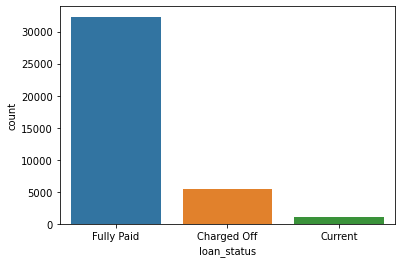

In [28]:
# We will now analyse on the predicting data. 
sb.countplot(x= DroppedLoanDF["loan_status"])
plt.show()

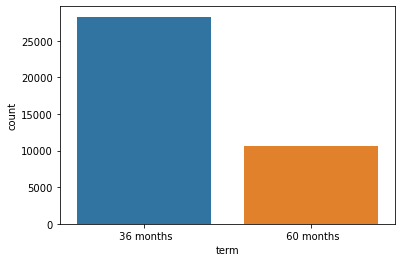

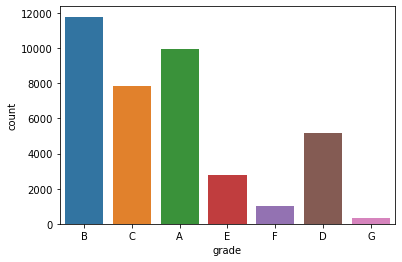

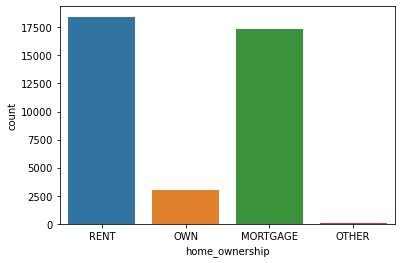

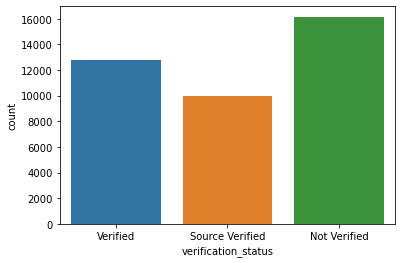

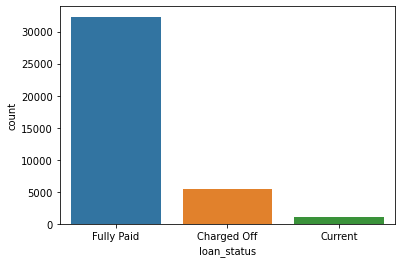

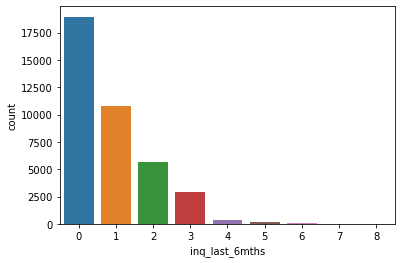

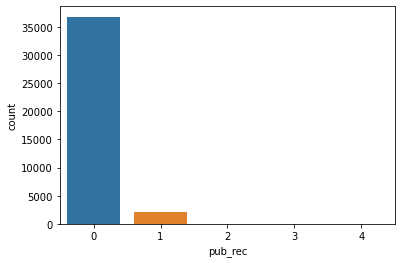

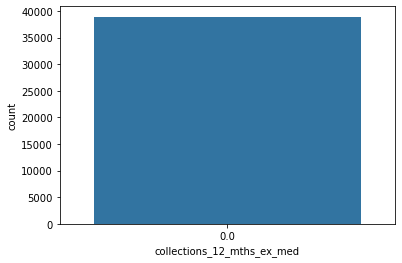

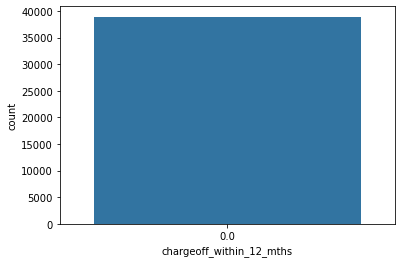

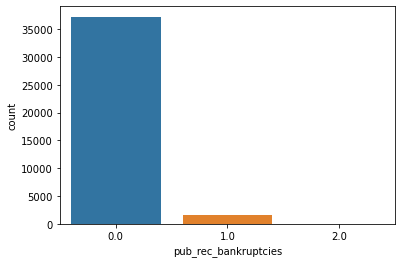

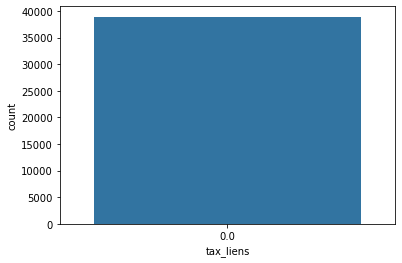

In [29]:
# Categorical column analysis
# We use count plot to perform categorical column analysis. 
droppedObj.categoricalColumnsAnalysis(categorical, segmented = False)

<p> There are more data on the fully paid side. </p>

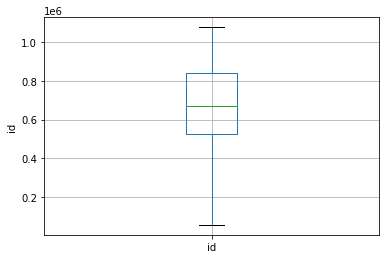

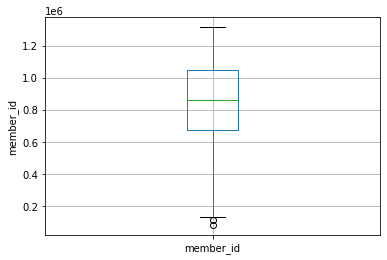

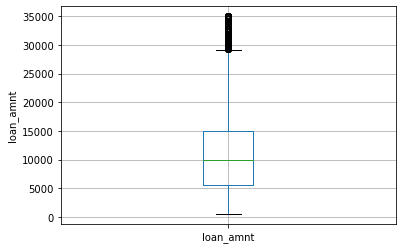

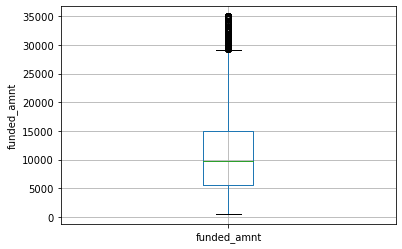

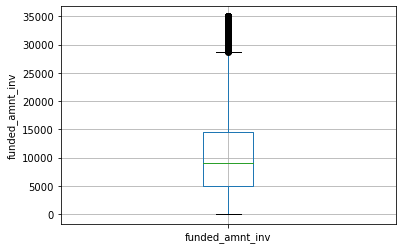

int_rate is not of type integer


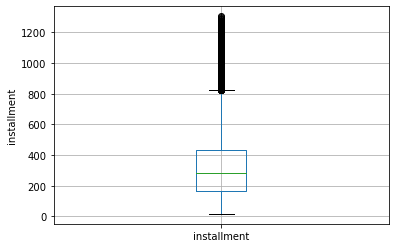

sub_grade is not of type integer


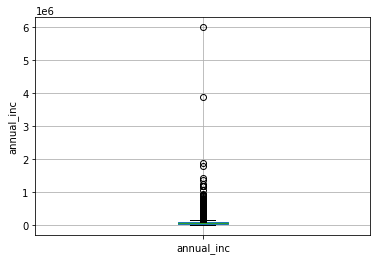

issue_d is not of type integer
url is not of type integer
purpose is not of type integer
title is not of type integer
zip_code is not of type integer
addr_state is not of type integer


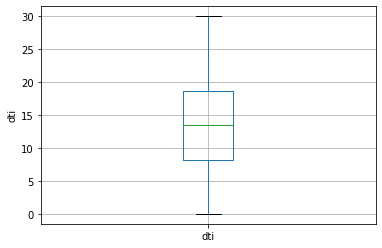

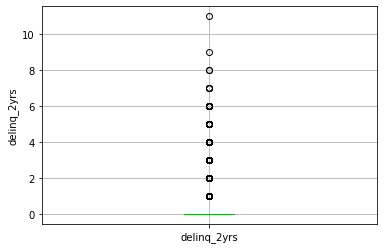

earliest_cr_line is not of type integer


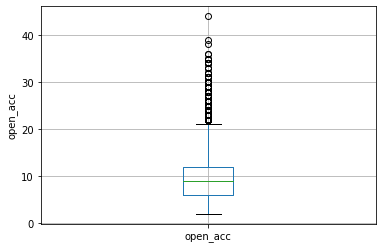

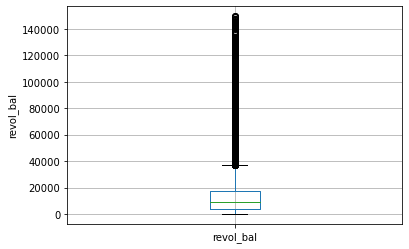

revol_util is not of type integer


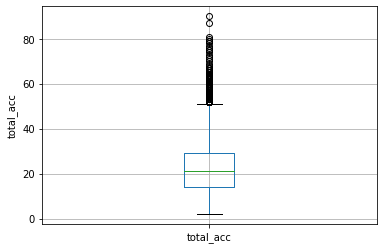

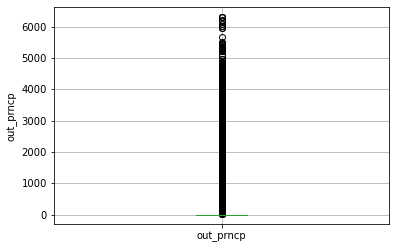

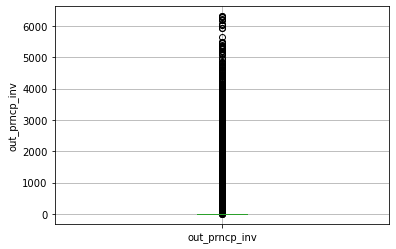

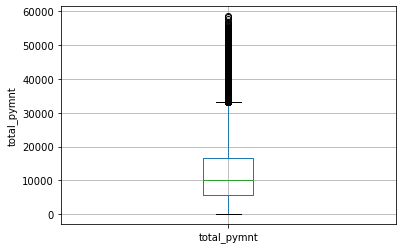

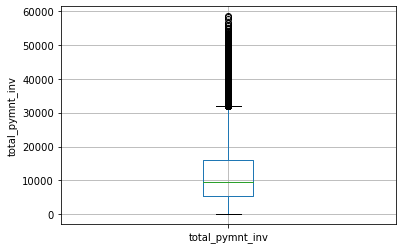

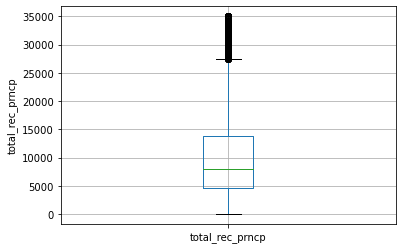

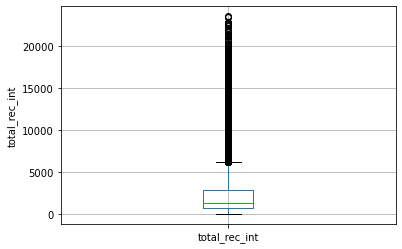

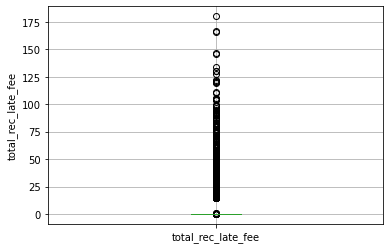

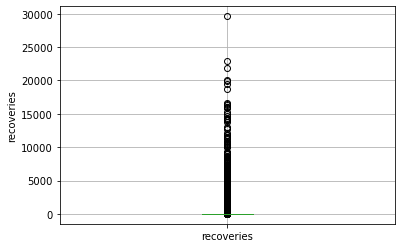

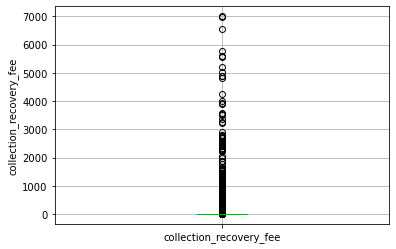

last_pymnt_d is not of type integer


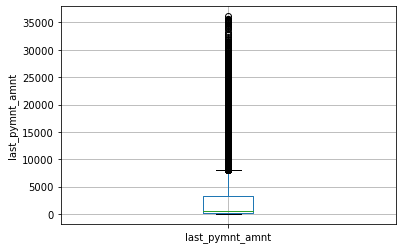

last_credit_pull_d is not of type integer


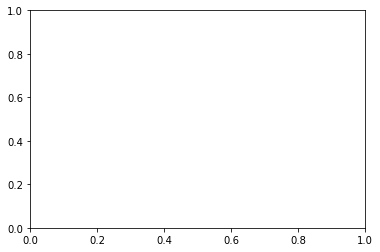

In [30]:
# Numerical column Analysis - We use boxplot to analyse on numerical column analysis. 
droppedObj = DataUnderstanding(DroppedLoanDF)
subPlotColumns = droppedObj.numericalColumnsAnalysis(continuous, segmented = False)

## 2. Segmented Univariate Analysis

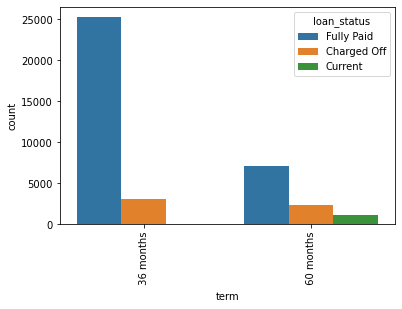

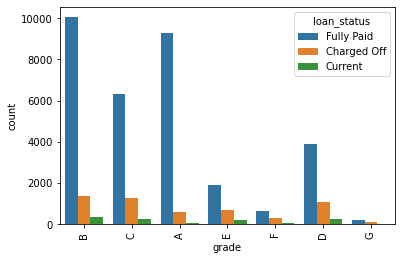

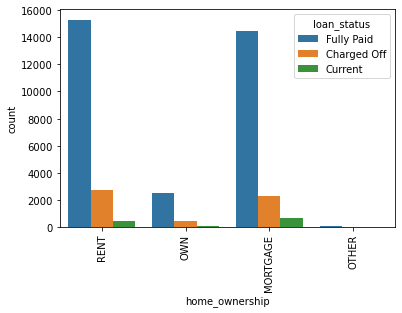

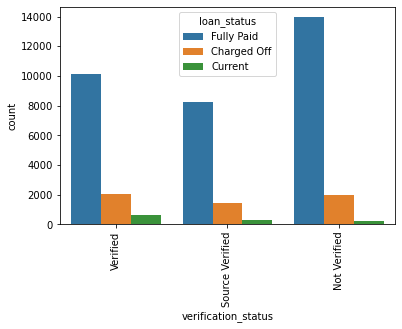

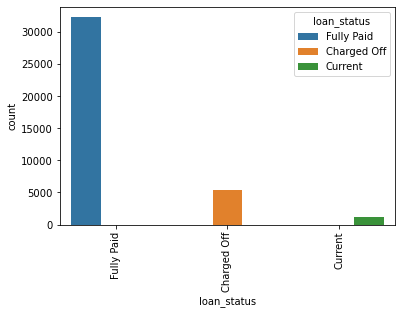

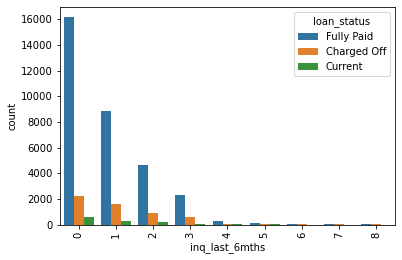

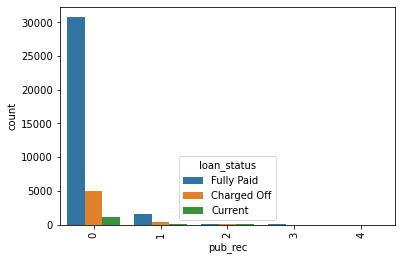

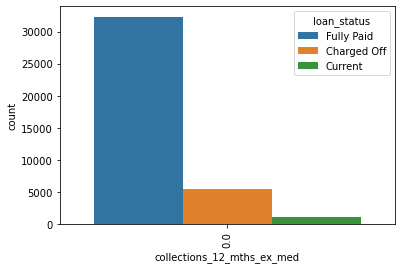

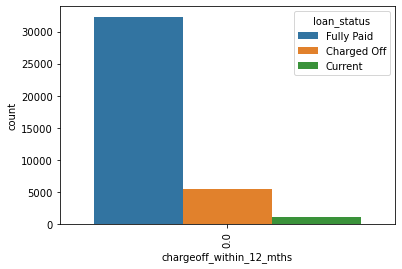

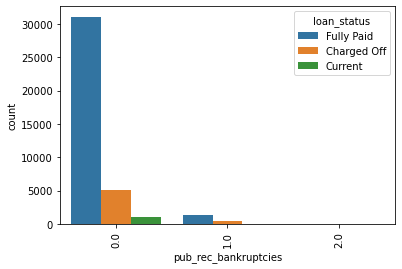

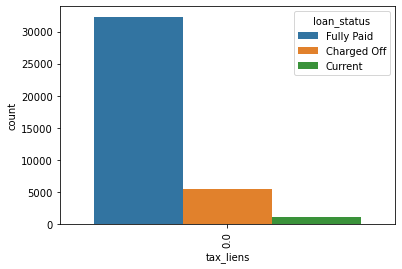

In [31]:
# Categorical columns segmented univariate analysis. 
droppedObj.categoricalColumnsAnalysis(categorical, segmented = True)

<p> 
    <b>term </b> -> We can observe that employee who had 36 months has been charged off more than the those who took loan for 60 months. <br>
<b>grade</b> -> Those with grade B, C, D were charged of more than G adn F this could be because of the imbalance in the dataset. 
<br>
<b>home_ownership</b> -> We can observe that home_ownership plays an important role in the dataset. Those who had rent and mortgage were likely to charge off more than the "own" category ones.
<br>
<b>verification_status</b> -> This field doesn't play much role in deciding the loan status. 
<br>
<b>inq_last_6months</b> -> have more charged off status in 0. But this is because of the lack of data. 
The other variables have data imbalance as well.
<br>
</p>

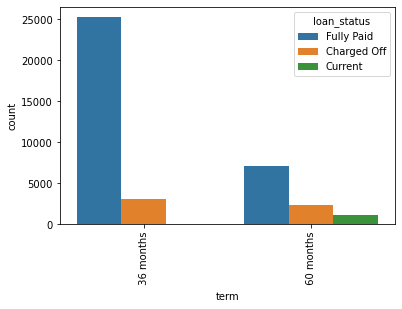

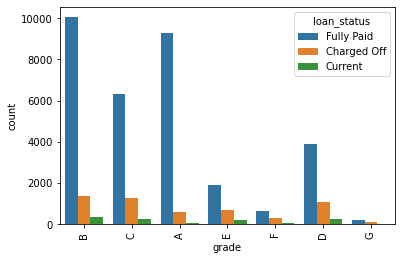

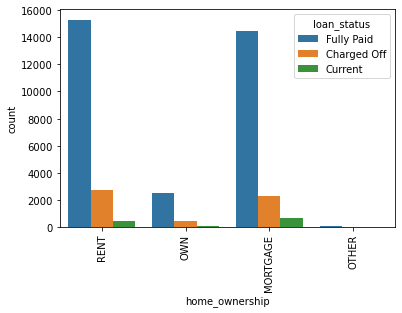

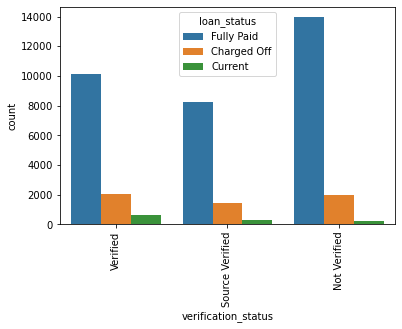

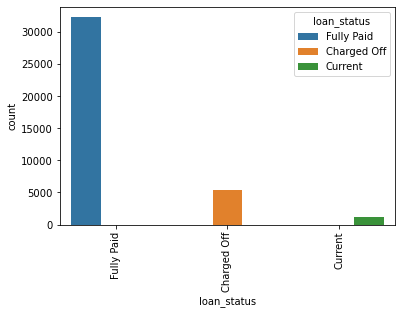

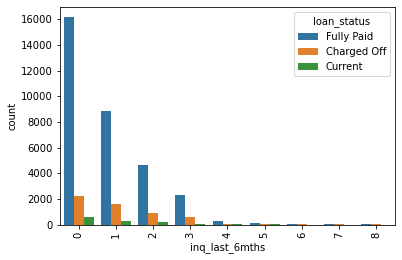

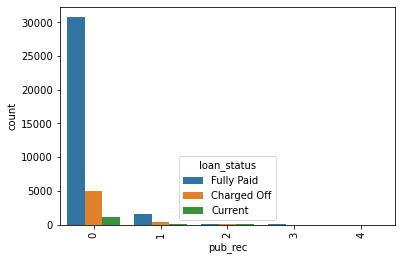

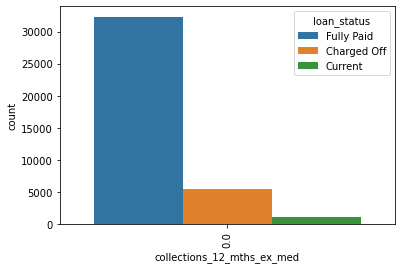

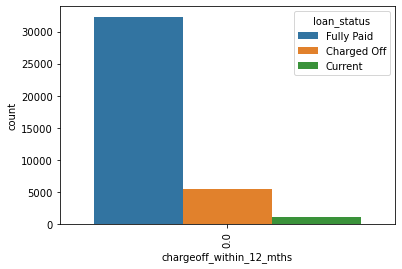

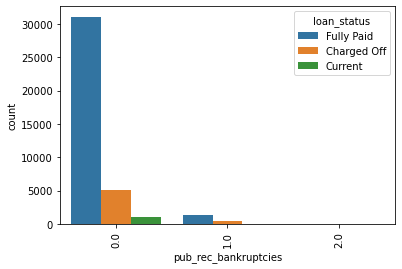

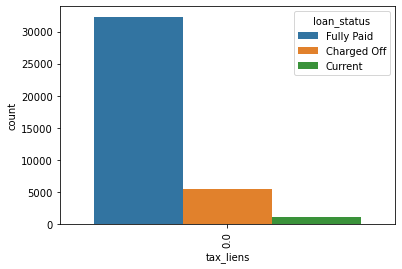

In [32]:
# Categorical columns segmented univariate analysis. 
droppedObj.categoricalColumnsAnalysis(categorical, segmented = True)

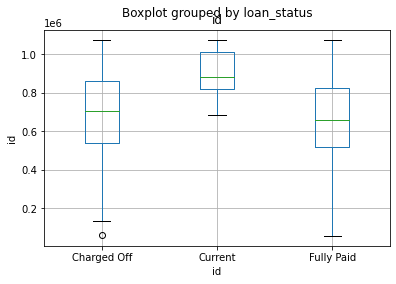

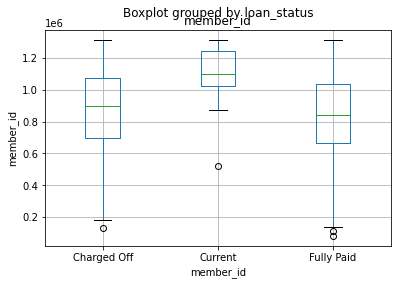

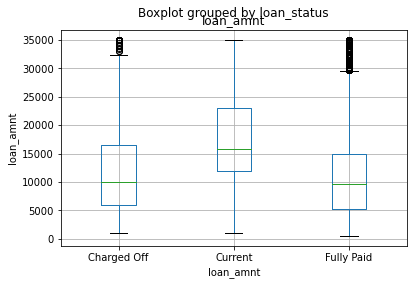

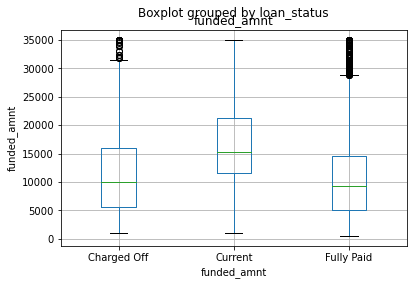

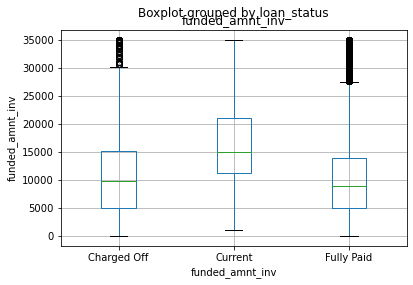

int_rate is not of type integer


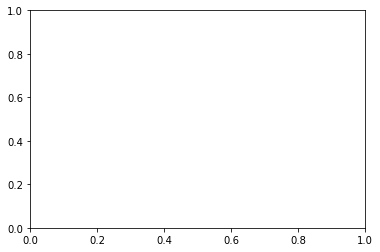

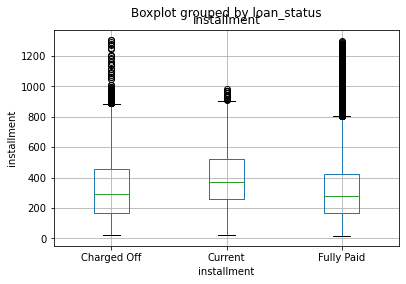

sub_grade is not of type integer


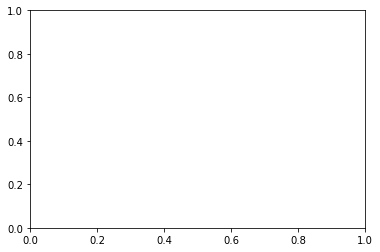

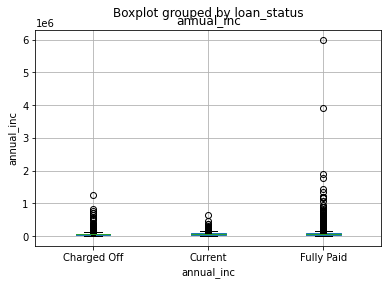

issue_d is not of type integer
url is not of type integer
purpose is not of type integer
title is not of type integer
zip_code is not of type integer
addr_state is not of type integer


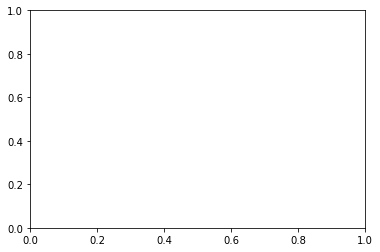

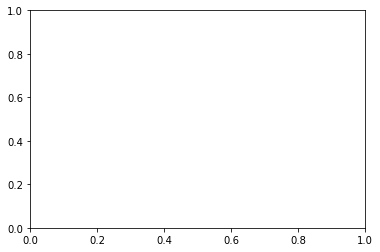

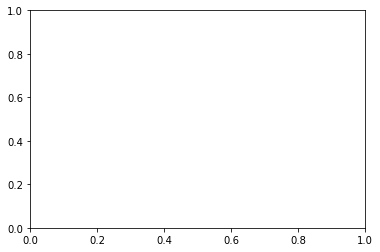

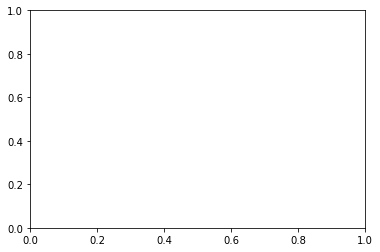

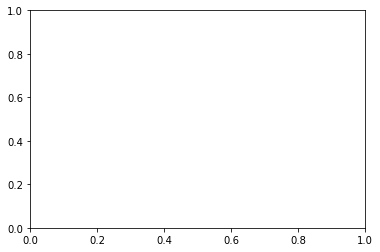

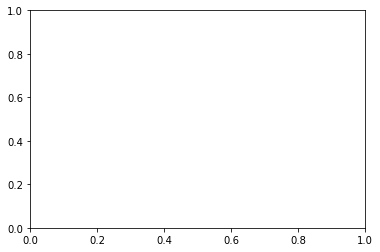

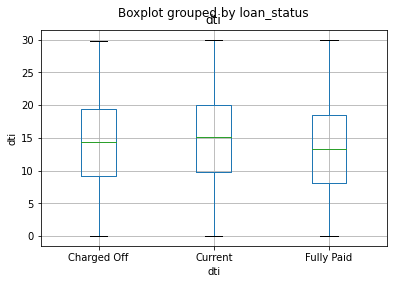

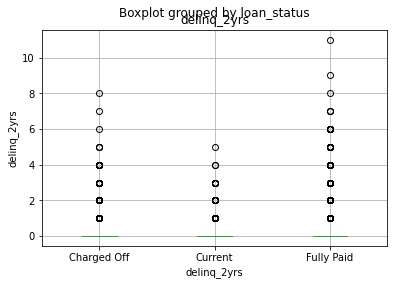

earliest_cr_line is not of type integer


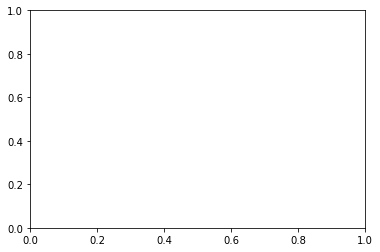

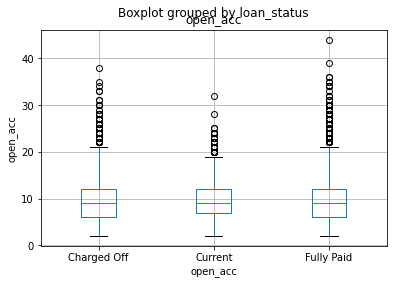

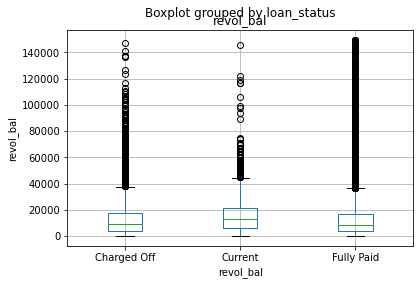

revol_util is not of type integer


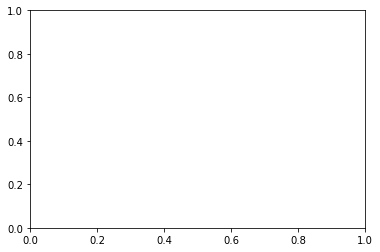

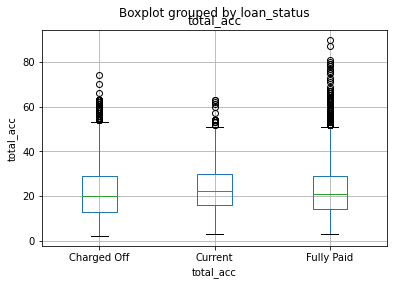

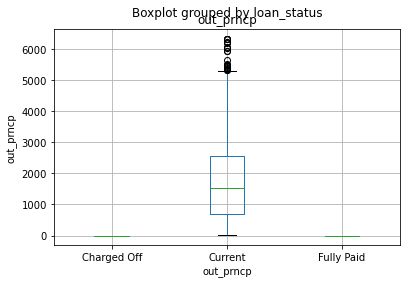

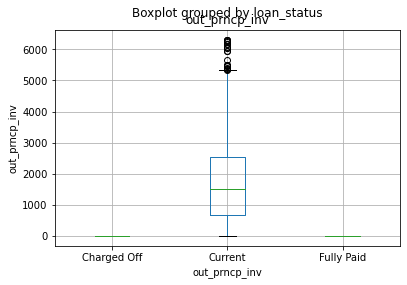

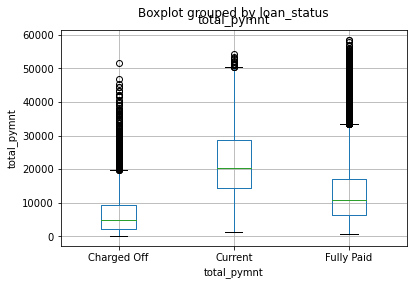

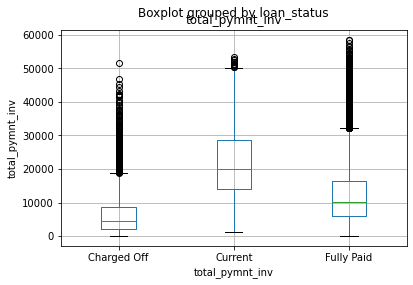

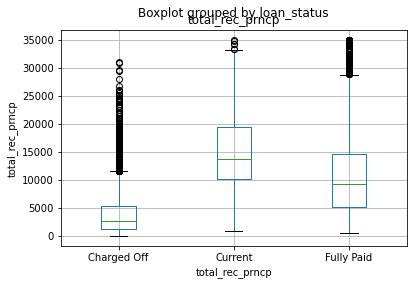

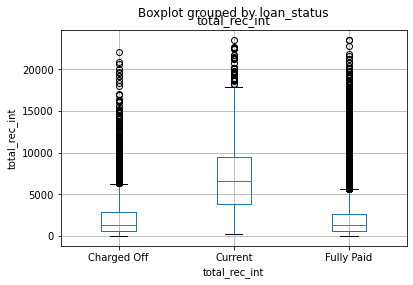

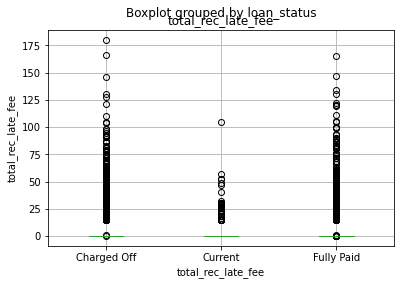

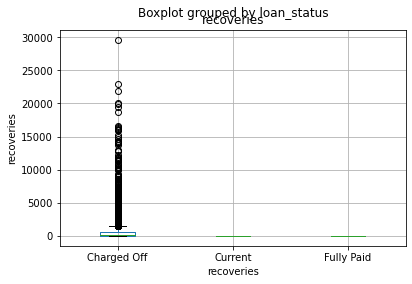

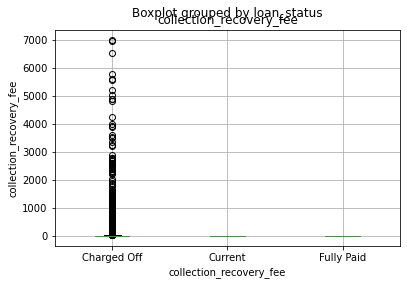

last_pymnt_d is not of type integer


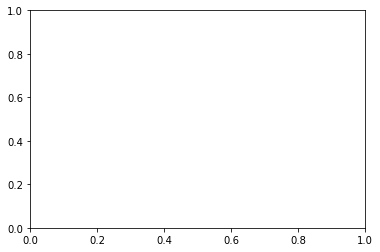

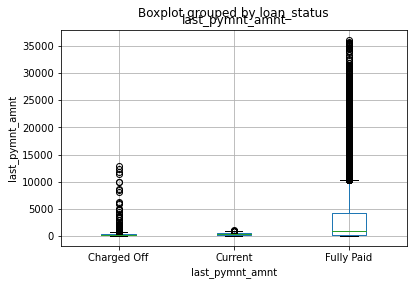

last_credit_pull_d is not of type integer


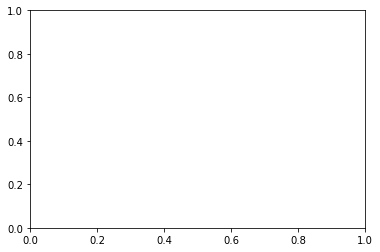

In [33]:
# Numerical columns segmented univariate analysis. 
droppedObj = DataUnderstanding(DroppedLoanDF)
droppedObj.numericalColumnsAnalysis(continuous, segmented = True)

<p>There are outliers in the dataset but if we remove them, then there will be very less number of data. So we will be considering it as it as and will be taking the median instead of mean wherever it requires. </p>

## 3. Bivariate Analysis

<p> We will now find the relationship between two variables by using bivariate analysis. <br>
    We will use correlation between the two variables. For finding for the many variables, we will use heatmap.<br> 
    The value ranges from -1 to +1. <br>
    -1 - Negatively correlated<br>
    0 - No impact<br>
    1 - Positively correlated<br>
</p>

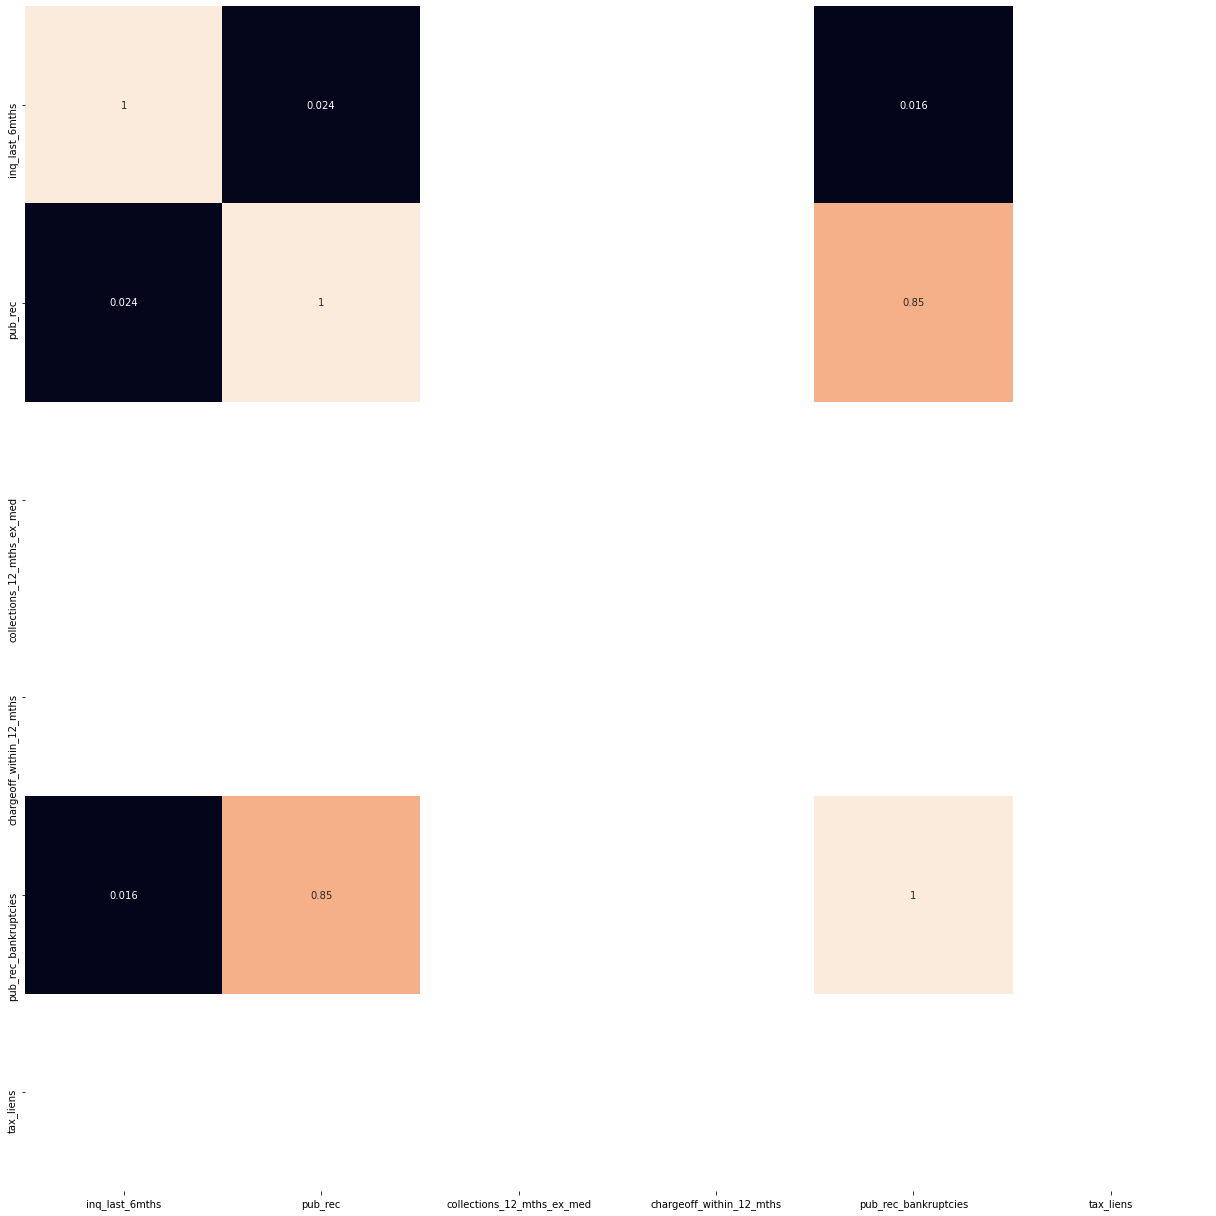

In [34]:
plt.figure(figsize=(17,17))
sb.heatmap(DroppedLoanDF[categorical].corr(), annot = True, cbar = False)
plt.tight_layout()
plt.show()

<p> pub_rec and pub_rec_bankruptcies are positively correlated to each other. 
 inq_last_6mnths and pub_rec, inq_last_6mnths and pub_rec_bankruptcies are negatively correlated to each other </p>

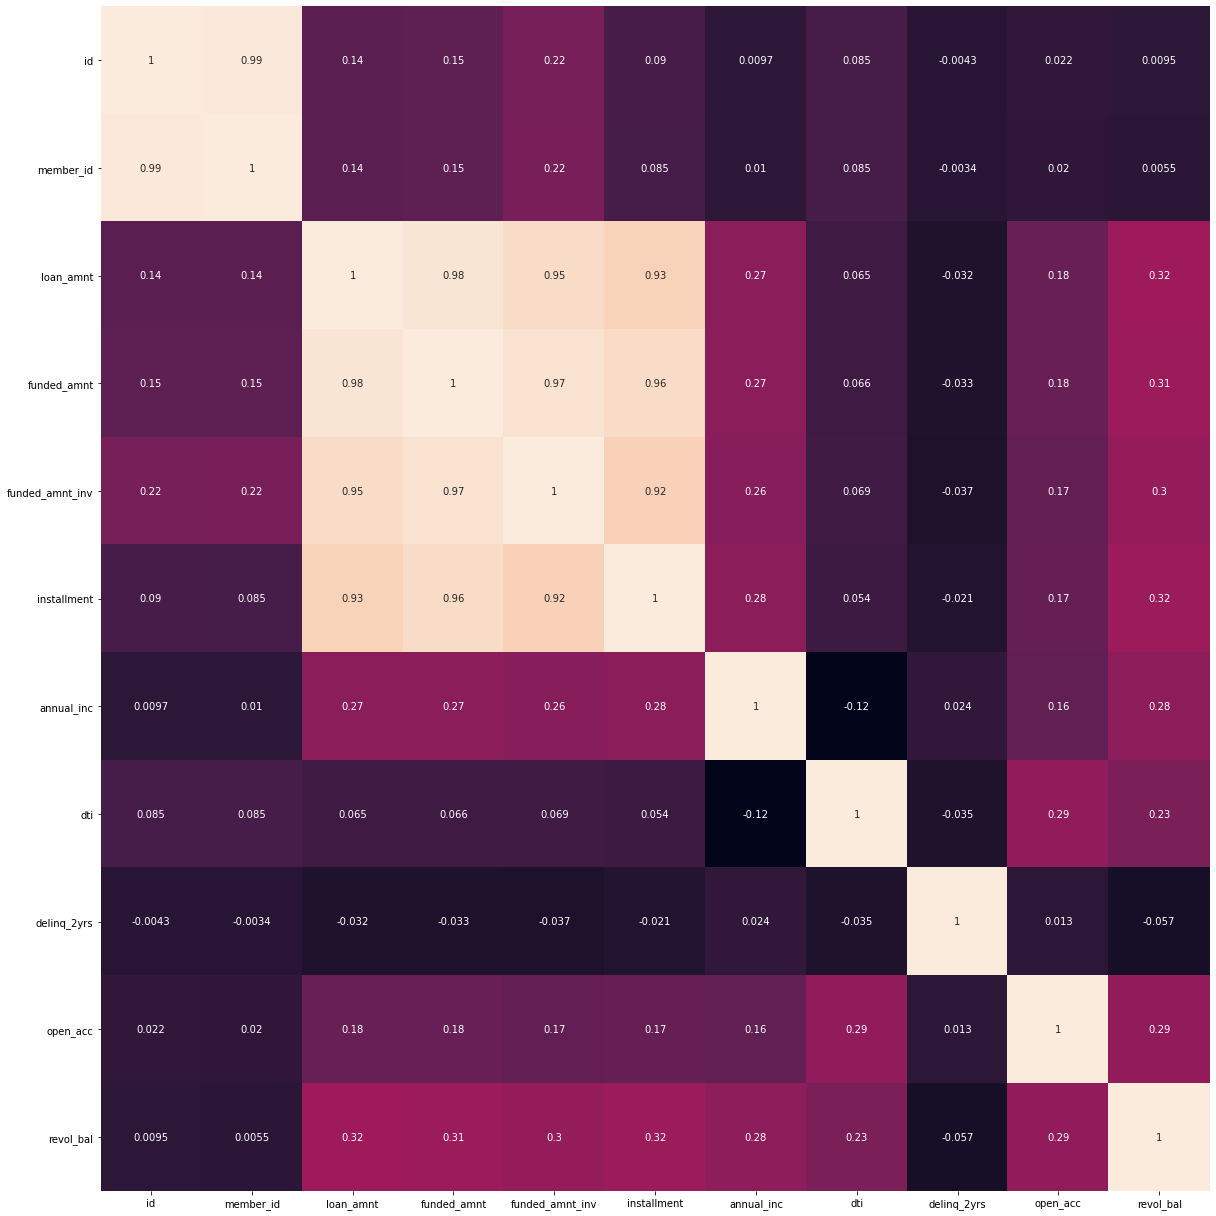

In [35]:
plt.figure(figsize=(17,17))
sb.heatmap(DroppedLoanDF[continuous[0:20]].corr(), annot = True, cbar = False)
plt.tight_layout()
plt.show()

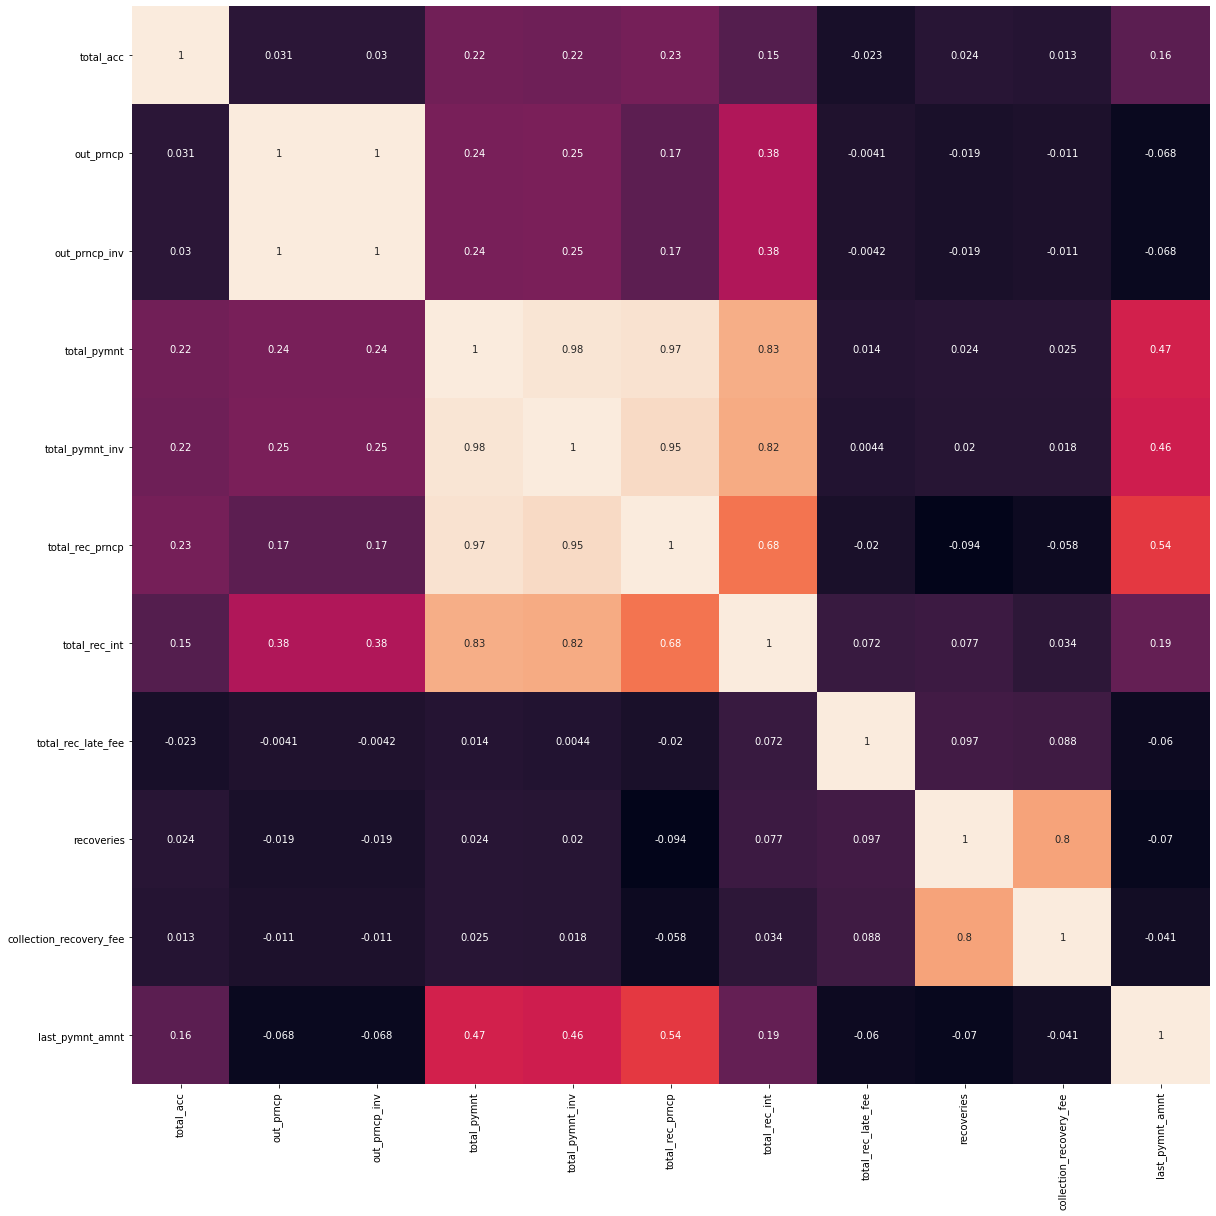

In [36]:
plt.figure(figsize=(17,17))
sb.heatmap(DroppedLoanDF[continuous[20:]].corr(), annot = True, cbar = False)
plt.tight_layout()
plt.show()

Recovery is highly correlated with collection recovery. <br>
We can see that loan amount and funded amount are highly correlated.<br>
We will now check for correlation between funded amount and total payment as it seems to belong to money category.<br>

Funded Amount: mean=10980.728 stdv=7199.161
Total Payment: mean=12220.504 stdv=9068.368


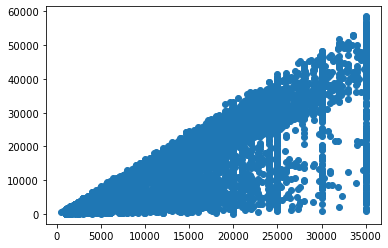

In [37]:
print('Funded Amount: mean=%.3f stdv=%.3f' % (np.mean(DroppedLoanDF['funded_amnt']), np.std(DroppedLoanDF['funded_amnt'])))
print('Total Payment: mean=%.3f stdv=%.3f' % (np.mean(DroppedLoanDF['total_pymnt']), np.std(DroppedLoanDF['total_pymnt'])))
# plot
plt.scatter(DroppedLoanDF['funded_amnt'], DroppedLoanDF['total_pymnt'])
plt.show()

<p> We can note a positive correlation between funded amount and total payment. </p>

In [38]:
np.corrcoef(DroppedLoanDF['funded_amnt'], DroppedLoanDF['total_pymnt'])

array([[1.        , 0.90524791],
       [0.90524791, 1.        ]])

<p> With this we can see a good correlation between these two. </p>

In [39]:
# We will now create another column
DroppedLoanDF['Profit and Loss']=(
    DroppedLoanDF['total_pymnt']-DroppedLoanDF['funded_amnt']
)*100/DroppedLoanDF['funded_amnt']

In [40]:
DroppedLoanDF[['Profit and Loss']]

,Profit and Loss
0,17.263104
1,-59.651600
2,25.236118
3,22.318900
4,17.111000
...,...
39475,2.893499
39551,16.128665
39562,6.960110
39573,16.771742


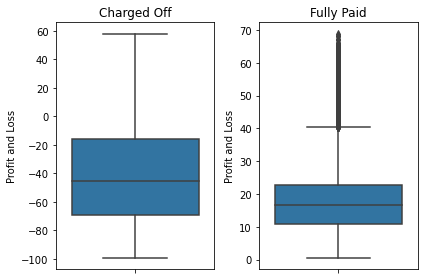

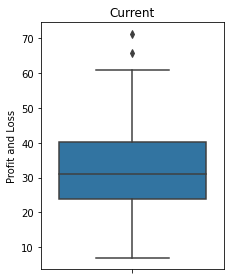

In [41]:
# We will now check profit and Loss with Loan Status
plt.subplot(1,2,1)
plt.title('Charged Off')
plt.tight_layout()
sb.boxplot(y=DroppedLoanDF[DroppedLoanDF['loan_status']=='Charged Off']['Profit and Loss'])


plt.subplot(1,2,2)
plt.title('Fully Paid')
sb.boxplot(y=DroppedLoanDF[DroppedLoanDF['loan_status']=='Fully Paid']['Profit and Loss'])
plt.tight_layout()
plt.show()

plt.subplot(1,2,2)
plt.title('Current')
sb.boxplot(y=DroppedLoanDF[DroppedLoanDF['loan_status']=='Current']['Profit and Loss'])
plt.tight_layout()
plt.show()

<p> We can notice outliers in current, if we delete those, we will have very less data as there is a class imbalance already. </p>

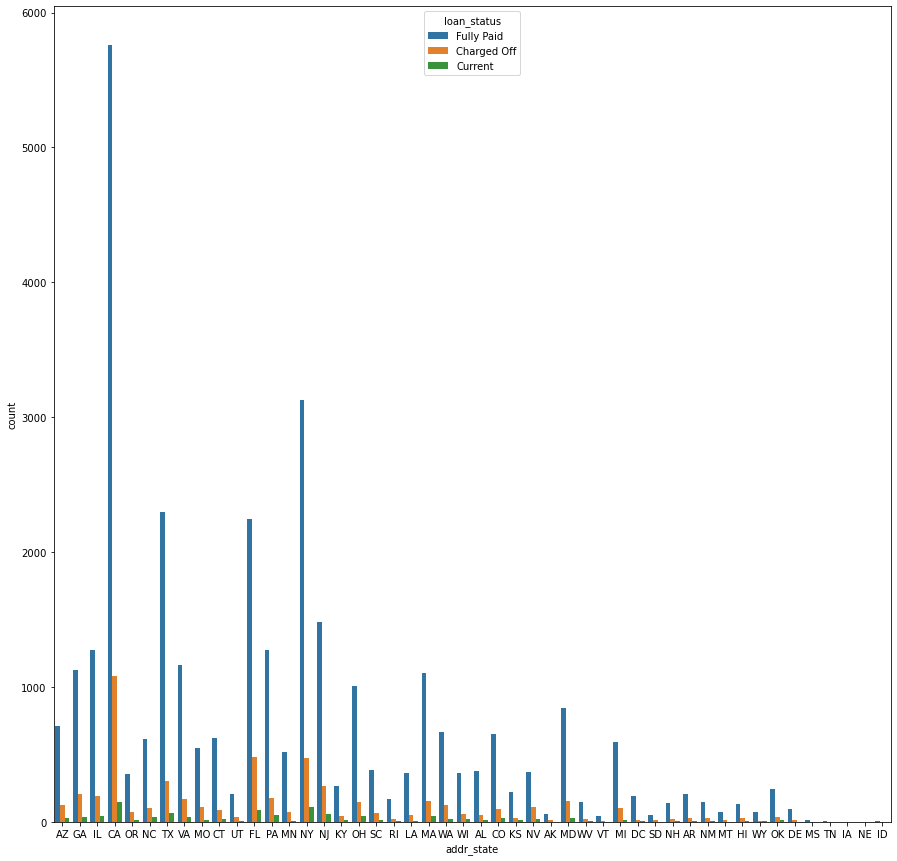

In [42]:
# Plotting address state count
plt.figure(figsize=(15,15))
sb.countplot(x='addr_state', data=DroppedLoanDF, hue = 'loan_status')
plt.show()

<p> We can observe a peak in California state where there are more loan defaulters followed by Florida and New York. </p>

<p>As per numerical column analysis for segmented Analysis, we can observe that loan_status has significance with funded amount</p>

<p>We can note one thing, as the amount increases, charged off numbers decrease. This is because of the imbalance in the dataset </p>

Funded amount has a good correlation between loan status.  

In [43]:
DroppedLoanDFAggregationGreater = DroppedLoanDF[DroppedLoanDF['funded_amnt'] > DroppedLoanDF['funded_amnt'].median()].groupby(['loan_status'])['funded_amnt'].count().reset_index()
DroppedLoanDFAggregationGreater

,loan_status,funded_amnt
0,Charged Off,2909
1,Current,903
2,Fully Paid,15625


In [44]:
DroppedLoanDF['annual_inc']

0         24000.00
1         30000.00
2         12252.00
3         49200.00
4         80000.00
           ...    
39475    100671.39
39551     80000.00
39562     35000.00
39573     63500.00
39623     39000.00
Name: annual_inc, Length: 38889, dtype: float64

array([[<AxesSubplot:title={'center':'funded_amnt'}>]], dtype=object)

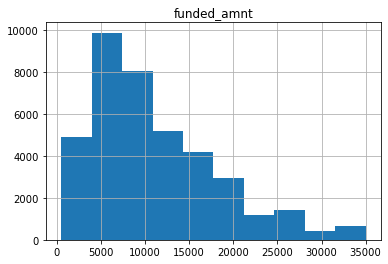

In [45]:
# Univariate analysis using impacting columns
DroppedLoanDF.hist(column='funded_amnt')

<p> There is a peak in values of amount 4000 to 7500, this concludes that funded amount is more between 4000 to 7500 </p>

## 4. Multivariate Analysis

<p> From the analysis stated above, it is clear that the impacting variables are 'Profit and Loss', 'total_pymnt', 'funded_amnt', 'home_ownership', 'term', 'grade'</p>

In [46]:
impactingColumns = ['Profit and Loss', 'total_pymnt', 'funded_amnt', 'home_ownership', 'term', 'grade','annual_inc']

<p> We will now plot the variables accordingly. </p>

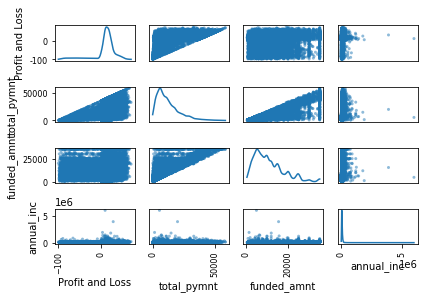

In [47]:
pd.plotting.scatter_matrix(DroppedLoanDF.loc[:,impactingColumns], diagonal="kde", range_padding = 0.1)
plt.tight_layout()
plt.show()

<p> These are numerical variables, we can conclude that Profit and loss, Total Payment, Funded Amount are highly correlated with each other. Annual income doens't have much relativity with Profit and loss, Total Payment and Funded Amount. But we will now check with loan status </p>

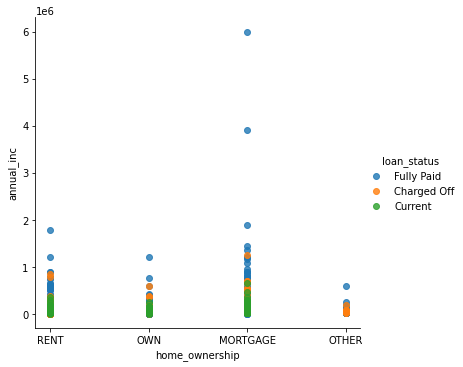

In [48]:
sb.lmplot(x='home_ownership', y='annual_inc', hue='loan_status', 
           data=DroppedLoanDF, 
           fit_reg=False)

<p> Annual income is related to home ownership. Higher annual income have higher chance of loan status to be fully paid. </p>

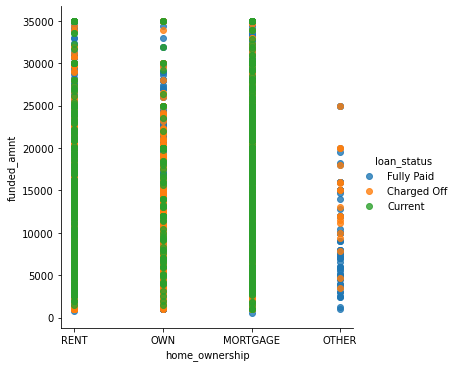

In [49]:
sb.lmplot(x='home_ownership', y='funded_amnt', hue='loan_status', 
           data=DroppedLoanDF, 
           fit_reg=False)

People who have their home status as mortgage are still paying loan. There are more people in Others category who are charged off. <br>
We can observe one thing that the peak values of funded amount are 4000 to 7500 and the people who have their <br>
home ownership status as OWN are more likey to be charged off in the middle range. 
<br>There are more number of fully paid loan status for amount higher than 25000 in home ownership status as OWN. 
<br> It is actually a deciding factor now that home ownership for OWN has both profit and loss and 
<br> we can give higher funded amount to people who have the home ownership status as OWN. 

<p> There are more number of Defaulters who have their home ownership status as Rent and mortgage. </p>

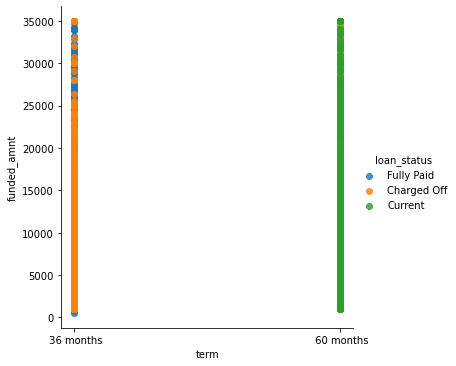

In [50]:
sb.lmplot(x='term', y='funded_amnt', hue='loan_status', 
           data=DroppedLoanDF, 
           fit_reg=False)

<p> There are more people who are charged off in 36 months comparative to 60 months as more number of people are still paying the loan. Which is also a good sign for profit for 60 months.  </p> 

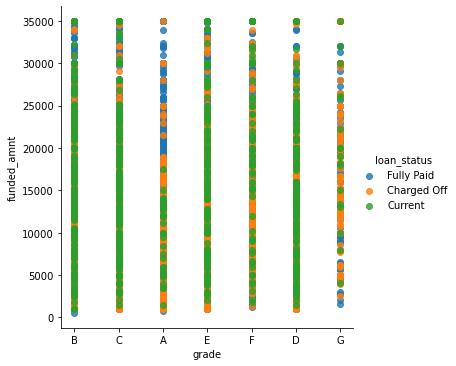

In [51]:
sb.lmplot(x='grade', y='funded_amnt', hue='loan_status', 
           data=DroppedLoanDF, 
           fit_reg=False)

<p>We can there are higher chances of being charged off for grade category C and D. Lower chances for A and B </p>

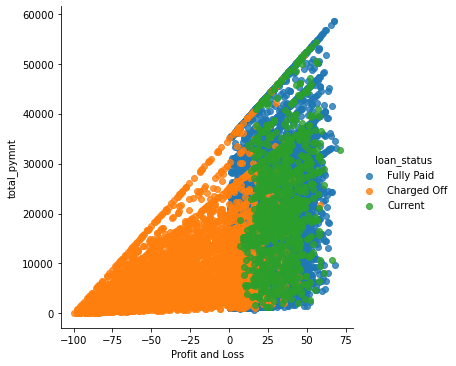

In [52]:
sb.lmplot(x='Profit and Loss', y='total_pymnt', hue='loan_status', 
           data=DroppedLoanDF, 
           fit_reg=False)

<p>Fully paid amount definitely has more values of profit compared to current and charged off is the least value this is because, it makes sense that if a person has fully paid the loan, then there is a profit, if a person has charged off then the total payment is less and profit is also less. This concludes a positive correlation </p>

# Conclusion

<p>The most impacting valriables are 'Profit and Loss', 'total_pymnt', 'funded_amnt', 'home_ownership', 'term', 'grade', 'annual_inc'. <br> 
This concludes that a person with Grade B or A, home status as own, State as Texas is likely to fully pay the loan. Higher annual income of a person concludes that the person will be paying the loan fully. Whereas, there is a higher chance of a person who is in places like CA, MD, MI as address state, Grade as C or D and home ownership status as Mortgage to be charged off.</p> 

<b>Impacting Variables to be charged off =  'Profit and Loss', 'total_pymnt', 'funded_amnt', 'home_ownership', 'term', 'grade', 'annual_inc'</b>